In [86]:
%matplotlib inline
import pysal as ps
import numpy as np
#from pysal.contrib import pdio
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

## How to classify

In [88]:
class Classifications:
    def __init__(self, shape_name, attribute, k):
        df = ps.pdio.read_files(ps.examples.get_path(shape_name))
        self.attribute = attribute
        self.shape_name = shape_name
        self.data = [i[0] for i in df[[attribute]].values.tolist()]
        self.k = k
    
    def quantiles(self):
        w = 100. / self.k
        p = np.arange(w, 100 + w, w)
        if p[-1] > 100.0:
            p[-1] = 100.0
        q = np.array([stats.scoreatpercentile(self.data, pct) for pct in p])
        return np.unique(q)

    def equal_interval(self):
        mi = min(self.data)
        ma = max(self.data)
        width = (ma - mi)/ float(self.k)
        cuts = np.arange(mi+width, ma + width, width)
        if len(cuts) > self.k:
            cuts = cuts[0:self.k]
        cuts[-1] = ma
        q = cuts.copy()
        return np.unique(q)
    
    def natural_breaks(self):
        pass
    
    def mean_standard_deviation(self):
        pass
    
    def judge(self, cla_method):
        claR = []
        if cla_method == 'QT':
            claR = self.quantiles()
        if cla_method == 'EI':
            claR = self.equal_interval()
        if cla_method == 'NB':
            claR = self.natural_breaks()
        if cla_method == 'MSD':
            claR = self.mean_standard_deviation()
        
        class_N = []
        for i, data in enumerate(self.data):
            for k, clas in enumerate(claR):
                if (data <= clas and k == 0) or (data <= clas and data > claR[k-1]):
                    c = k
                    class_N.append(c)
                else: continue
        return class_N

c = Classifications('columbus.dbf', 'CRIME', 5)
classification = c.judge('QT')
classification.sort()
classification

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

### for Pysal

In [89]:
df = ps.pdio.read_files(ps.examples.get_path('columbus.dbf'))
#classifier = ps.Quantiles.make(k=9)
#classification = df[['HOVAL']]
df[['class']] = df[['HOVAL']].apply(ps.Quantiles.make(k=5))

mini = df[['HOVAL','class']].groupby(['class']).agg(['min'])
maxm = df[['HOVAL','class']].groupby(['class']).agg(['max'])
m1 = [i[0] for i in mini.values.tolist()]
m2 = [i[0] for i in maxm.values.tolist()]
ran = zip(m1,m2)
ran

[(17.9, 22.85),
 (23.225, 30.450001),
 (30.6, 37.125),
 (39.599998, 44.567001),
 (47.733002, 96.400002)]

## How to draw plots

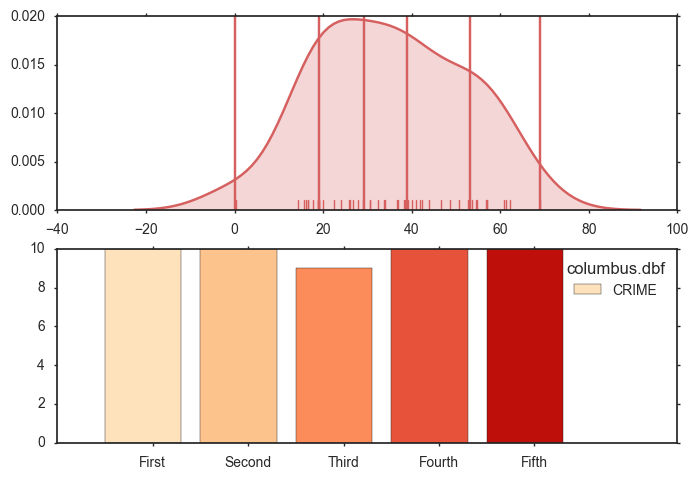

In [90]:
from itertools import groupby
class Plotting (Classifications):
    def __init__(self, shape_name, attribute, k, color):
        Classifications.__init__(self, shape_name, attribute, k)
        self.color = color
    def distribution(self,cla_method):
        if cla_method == 'QT':
            clalines = Classifications.quantiles(self)
        if cla_method == 'EI':
            clalines = Classifications.equal_interval(self)
        if cla_method == 'NB':
            clalines = Classifications.natural_breaks(self)
        if cla_method == 'MSD':
            clalines = sClassifications.mean_standard_deviation(self)
        
        sns.set(palette="muted", color_codes=True)
        sns.set_style("ticks", {"xtick.major.size": 2, "ytick.major.size": 2})
        c = clalines.tolist()
        c.append(min(self.data))
        
        plt.subplot(2,1,1)
        for i in c:
            plt.axvline(x=i,color = self.color)
        fig1 = sns.distplot(self.data, hist=False,rug=True,kde_kws={"shade": True},color=self.color)
        #plt.legend(fig1, [aaa], loc = "upper right", title = self.shape_name)

        plt.subplot(2,1,2)
        a = Classifications.judge(self, cla_method)
        a.sort()
        field = [len(list(group)) for key, group in groupby(a)]
        x=self.k
        y=field
        sns.set_context(rc={"figure.figsize": (8, 4)})
        nd = np.arange(x)
        width=1
        plt.xticks(nd+width/2., ('First','Second','Third','Fourth','Fifth', 'Sixth','Seveth','Eighth','Nineth'))
        plt.xlim(-0.5,self.k+1)
        fig = plt.bar(nd, y, color=sns.color_palette('OrRd',self.k))
        plt.legend(fig, [self.attribute], loc = "upper right", title = self.shape_name)
        plt.show()
    def legend(self,cla_method):
        pass
    
p = Plotting('columbus.dbf','CRIME', 5, 'r')
p.distribution('QT')

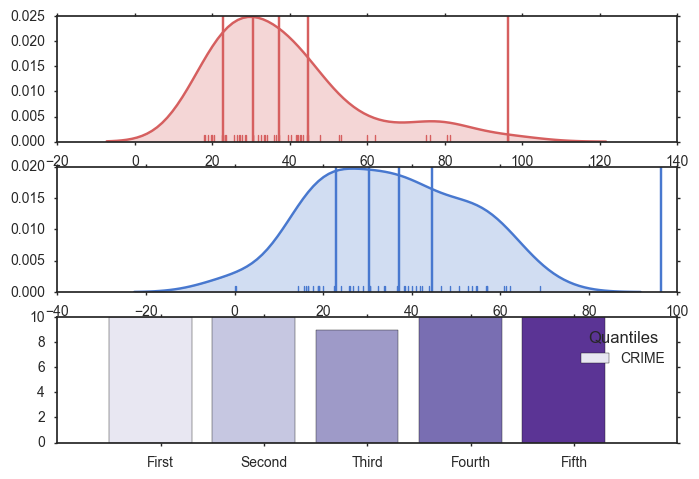

In [92]:
df1 = ps.pdio.read_files(ps.examples.get_path('columbus.dbf'))['HOVAL']
df2 = ps.pdio.read_files(ps.examples.get_path('columbus.dbf'))['CRIME']
field1 = []
field2 = []
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_style("ticks", {"xtick.major.size": 2, "ytick.major.size": 2})

for data1,data2 in zip(df1.values.tolist(),df2.values.tolist()):
    field1.append(data1)
    field2.append(data2)

plt.subplot(3,1,1)
for i in m2:
    plt.axvline(x=i,color = 'r')
#ax.get_yaxis().set_visible(False)
#fig = plt.bar(nd, y, color=sns.color_palette("Greens_d"))
fig1 = sns.distplot(field1,hist=False,rug=True,kde_kws={"shade": True},color="r")

plt.subplot(3,1,2)
for i in m2:
    plt.axvline(x=i,color = 'b')
fig2 = sns.distplot(field2,hist=False,rug=True,kde_kws={"shade": True},color="b");

plt.subplot(3,1,3)
def read_filed(name = 'columbus.dbf',filed = 'CRIME', classification = 'Quantiles', k = 5, color = "Greens_d"):
    df = ps.pdio.read_files(ps.examples.get_path('columbus.dbf'))
    df[['class']] = df[['HOVAL']].apply(ps.Quantiles.make(k=5))
    #df.head()
    classifications = df[['HOVAL','class']].groupby(['class']).agg(['count'])# ?? what is k??
    cla = classifications.head()
    field = []
    for data in classifications.values.tolist():
        field.append(data[0])
    x=5
    y=field
    sns.set_context(rc={"figure.figsize": (8, 4)})
    nd = np.arange(x)
    width=1
    plt.xticks(nd+width/2., ('First','Second','Third','Fourth','Fifth'))
    plt.xlim(-0.5,5.5)
    fig = plt.bar(nd, y, color=sns.color_palette(color,5))
    plt.legend(fig, [filed], loc = "upper right", title = classification)
    plt.show()
    return field

a = read_filed(name = 'columbus.dbf',filed = 'CRIME', classification = 'Quantiles', k = 8, color = "Purples")

## Legend

In [93]:
from matplotlib.colors import LinearSegmentedColormap

In [94]:
x = np.arange(0, 10, 1)
y = np.arange(0, 9, 1)[::-1]
X,Y = np.meshgrid(x, y)
Z = X + Y
Z

array([[ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9]])

In [107]:
#get_ipython().magic(u'matplotlib inline')

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mpc

#from ipywidgets import Dropdown, RadioButtons,  HBox, interact
from IPython.display import display
from pysal.contrib.viz import mapping as maps
from pysal.contrib.viz.color import get_maps_by_type
from pysal.contrib.viz.color import qualitative, sequential, diverging
from pysal.contrib.viz.color import get_color_map

ctypes = (sequential, diverging, qualitative)
color_display_types = {}
for ctype in ctypes:
    cmaps = get_maps_by_type(ctype)
    ctype_name = ctype.__name__.split(".")[-1]
    displays = {}
    for cmap in cmaps:
        cmap = cmap.split("_")[0]
        if cmap not in displays:
            c = get_color_map(cmtype=ctype_name, name=cmap)
            displays[cmap] = c
    color_display_types[ctype_name] = displays

In [108]:
import palettable as pltt
from palettable.colorbrewer import qualitative, sequential, diverging


def _build_pltt2type():
    types = ['sequential', 'diverging', 'qualitative']
    pltt2type = {}
    for t in types:
        pals = list(set([
            p.split('_')[0] for p in dir(getattr(pltt.colorbrewer, t))
                            if p[0]!='_'
                            ]))
        pals = pals + [p+'_r' for p in pals]
        for p in pals:
            pltt2type[p.lower()] = t
    return pltt2type

pltt2type = _build_pltt2type()

def get_maps_by_type(data_type):
    names = [name for name in dir(data_type) if not name.startswith('_')]
    return names

def get_color_map(palette=None, name='BuGn', cmtype='sequential', k=5,
                  color_encoding='rgb'):
    encs = {'hex': 'hex_colors',
            'rgb': 'colors',
            'mpl': 'mpl_colors',
            'mpl_colormap': 'mpl_colormap'}
    if not palette:
        cmtype = pltt2type[name.lower()]
        if name[-2:] == '_r':
            palette = pltt.colorbrewer.get_map(name[:-2], cmtype,
                    k, reverse=True)
        else:
            palette = pltt.colorbrewer.get_map(name, cmtype, k)
    colors = getattr(palette, encs[color_encoding.lower()])
    return colors
a= np.array(get_color_map(name='Blues'))
a

array([[239, 243, 255],
       [189, 215, 231],
       [107, 174, 214],
       [ 49, 130, 189],
       [  8,  81, 156]])

In [109]:
b = np.array(get_color_map(name='RdPu'))
b

array([[254, 235, 226],
       [251, 180, 185],
       [247, 104, 161],
       [197,  27, 138],
       [122,   1, 119]])

In [110]:
import struct
legend = []
for con2, belt in enumerate(b):
    cls = []
    for con1, hue in enumerate(a):
        rgb = (belt + hue)/2
        c = '#' + struct.pack('BBB',*rgb).encode('hex')
        cls.append(c)
    legend.append(cls)
legend

[['#f6eff0', '#dde1e4', '#b4ccdc', '#97b6cf', '#839ebf'],
 ['#f5d3dc', '#dcc5d0', '#b3b1c7', '#969bbb', '#8182aa'],
 ['#f3add0', '#da9fc4', '#b18bbb', '#9475af', '#7f5c9e'],
 ['#da87c4', '#c179b8', '#9864b0', '#7b4ea3', '#663693'],
 ['#b47abb', '#9b6caf', '#7257a6', '#55419a', '#412989']]

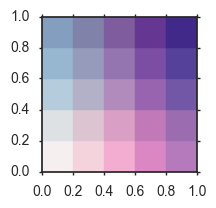

In [111]:
import matplotlib.colors as colors

def bipcmaps(dtype, ):
    fig = plt.figure(figsize=(2, 2))
    w = h = 0.2
    ax = fig.add_subplot(111, aspect='equal')
    for i, cmap in enumerate(legend):
        for j, clr in enumerate(cmap):
            #c = colors.
            c = mpc.hex2color(clr)
            p = patches.Rectangle((i/5.,j/5.), w, h, fill=True, color=c)
            ax.add_patch(p)
    
bipcmaps('sequential')

NameError: name 'ax' is not defined

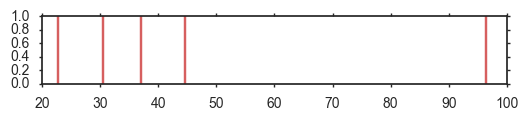

In [101]:
plt.subplot(4,1,1)
df1 = ps.pdio.read_files(ps.examples.get_path('columbus.dbf'))['HOVAL']
df2 = ps.pdio.read_files(ps.examples.get_path('columbus.dbf'))['CRIME']
field1 = []
field2 = []
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_style("ticks", {"xtick.major.size": 2, "ytick.major.size": 2})
#
for i in m2:
    plt.axvline(x=i,color = 'r')
#
for data1,data2 in zip(df1.values.tolist(),df2.values.tolist()):
    field1.append(data1)
    field2.append(data2)
    
ax.get_yaxis().set_visible(False)
#fig = plt.bar(nd, y, color=sns.color_palette("Greens_d"))
fig1 = sns.distplot(field1,hist=False,rug=True,kde_kws={"shade": True},color="r");
plt.subplot(4,1,2)
def bipcmaps(dtype = 'sequential'):
    fig = plt.figure(figsize=(2, 2))
    w = h = 0.2
    ax = fig.add_subplot(111, aspect='equal')
    for i, cmap in enumerate(legend):
        for j, clr in enumerate(cmap):
            c = mpc.hex2color(clr)
            p = patches.Rectangle((i/5.,j/5.), w, h, fill=True, color=c)
            ax.add_patch(p)
bipcmaps()
plt.subplot(4,2,2)
for i in m2:
    plt.axvline(x=i,color = 'b')
fig2 = sns.distplot(field2,hist=False,rug=True,kde_kws={"shade": True},color="b");

## Choropleth Mapping

In [ ]:
def plot_geocol_bk(gc, color=None, facecolor='#4D4D4D', edgecolor='#B3B3B3',
        alpha=1., linewidth=0.2, marker_size=10, hover=True, p=None, col=None):
    
    geom = type(gc.iloc[0])
    if color is not None:
        facecolor = edgecolor = color
    draw = False
    if not p:
        TOOLS="pan,wheel_zoom,box_zoom,reset,save"
        if hover:
            TOOLS += ',hover'
        p = bk.figure(tools=TOOLS,
           x_axis_location=None, y_axis_location=None)
        p.grid.grid_line_color = None
        draw = True
    # Geometry plotting
    patch_xs = []
    patch_ys = []
    ids = []
    pars = {'fc': facecolor, \
            'ec': edgecolor, \
            'alpha': alpha, \
            'lw': linewidth, \
            'ms': marker_size}
    ## Polygons + Lines
    if (geom == ps.cg.shapes.Polygon) or \
            (geom == ps.cg.shapes.Chain):
        for idx, shape in gc.iteritems():
            for ring in shape.parts:
                xs, ys = zip(*ring)
                patch_xs.append(xs)
                patch_ys.append(ys)
                ids.append(idx)
        if hover and col:
            tips = []
            ds = dict(x=patch_xs, y=patch_ys)
            for k,v in col.iteritems():
                ds[k] = v
                tips.append((k, "@"+k))
            cds = bk.ColumnDataSource(data=ds)
            h = p.select_one(HoverTool)
            h.point_policy = 'follow_mouse'
            h.tooltips = tips
        else:
            cds = bk.ColumnDataSource(data=dict(
                        x=patch_xs,
                        y=patch_ys
                        ))
        if type(facecolor) is pd.Series:
            cds.add(facecolor.reindex(ids), 'facecolor')
            pars['fc'] = 'facecolor'
        if type(edgecolor) is pd.Series:
            cds.add(edgecolor.reindex(ids), 'edgecolor')
            pars['ec'] = 'edgecolor'
        if type(alpha) is pd.Series:
            cds.add(alpha.reindex(ids), 'alpha')
            pars['alpha'] = 'alpha'
        if type(linewidth) is pd.Series:
            cds.add(linewidth.reindex(ids), 'linewidth')
            pars['lw'] = 'linewidth'
        if geom == ps.cg.shapes.Polygon:
            p.patches('x', 'y', source=cds,
              fill_color=pars['fc'],
              line_color=pars['ec'],
              fill_alpha=pars['alpha'],
              line_width=pars['lw']
              )
            facecolor = 'None'
            
    if draw:
        bk.show(p)
    return None

In [112]:
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

TOOLS = "pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)